# Naive Bayes in Python

In [1]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn.naive_bayes import GaussianNB

In [2]:
# read in data
df = pd.read_csv('/Users/brianwimmer/anly-501-project-brianwimmer-gu/data/OAG_Covid19_Aviation_Data_10October2022.Weekly_Global_Seats.csv')

In [3]:
# remove unnecessary columns
df = df.drop(df.columns[[5,6,7]],axis = 1)

# drop NaN values
df = df.dropna()

# remove commas
df = df.replace(',','', regex=True)

# change columns to numeric
df[["2019", "2020", "2021", "2022"]] = df[["2019", "2020", "2021", "2022"]].apply(pd.to_numeric)

# create targets: 
# 1: recovered since pandemic year (2020)
# 0: not recovered since pandemic year (202)
df['targets'] = np.where(df['2022'] > df['2020'], 1, 0)

# split target into different data set
df2 = df["targets"].copy()

In [5]:
# split into train and test sets
df_train = df.sample(frac= 0.8, random_state = 1)
df_test = df.drop(df_train.index)

x_train, x_test = df_train[["2019","2020","2021","2022"]].to_numpy(), df_test[["2019","2020","2021","2022"]].to_numpy()
y_train, y_test = df_train["targets"].to_numpy(), df_test["targets"].to_numpy()

In [6]:
# train Gaussian Naive Bayes model
clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [13]:
print('ACCURACY CALCULATION')
print('TRAINING SET:')
print('Accuracy: ',clf.score(x_train, y_train))
print('Number of mislabeled points out of a total 33 points = ', 33 - (clf.score(x_train, y_train) * 33))
print('')
print('ACCURACY CALCULATION')
print('TEST SET:')
print("Accuracy: ",clf.score(x_test, y_test))
print('Number of mislabeled points out of a total 8 points = ', 8 - (clf.score(x_test, y_test) * 8))
print('')

ACCURACY CALCULATION
TRAINING SET:
Accuracy:  1.0
Number of mislabeled points out of a total 33 points =  0.0

ACCURACY CALCULATION
TEST SET:
Accuracy:  1.0
Number of mislabeled points out of a total 8 points =  0.0



--------TRAINING DATA-------


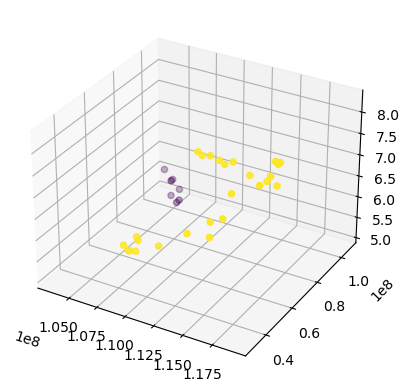

In [9]:
# visualize results of the training data
print("--------TRAINING DATA-------")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], marker='o',c=y_train)
plt.show()

[Text(0.5, 1.0, 'Correlation Matrix')]

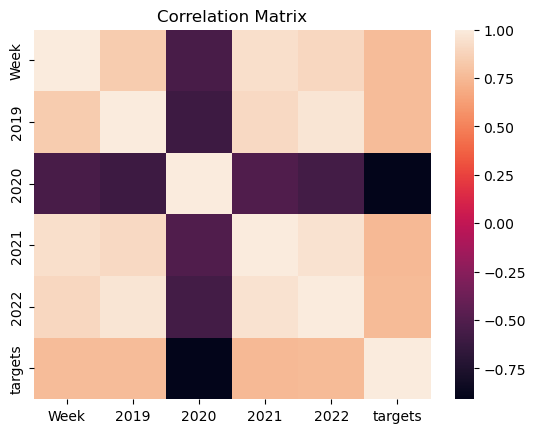

In [14]:
# correlation matrix
matrix = df.corr()
sns.heatmap(matrix).set(title='Correlation Matrix')


In [12]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[4, 0],
       [0, 4]])

In [19]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Week,2019,2020,2021,2022,targets
count,41.00000,41.00000,41.00000,41.00000,41.00000,41.00000
mean,22.00000,111576156.46341,61986034.34146,67363594.39024,90719697.19512,0.73171
std,11.97915,5096796.13154,25431209.75766,10550273.57349,9103873.92570,0.44857
min,2.00000,103315460.00000,30577575.00000,48157567.00000,73768296.00000,0.00000
25%,12.00000,106161003.00000,39911842.00000,59284496.00000,82118443.00000,0.00000
50%,22.00000,111780940.00000,57487639.00000,64075249.00000,90660936.00000,1.00000
75%,32.00000,115793635.00000,90472323.00000,78611081.00000,98507843.00000,1.00000
max,42.00000,119123242.00000,107929252.00000,82708203.00000,102553919.00000,1.00000
